# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we use transfer learning to train a CNN to classify dog breeds.

### 1. Load Dog Dataset

Before running the code cell below, download the dataset of dog images [here](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip) and place it in the respository.
### 狗的数据包上文链接

In [4]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)# data里是二进制格式和字符串的组合，因为读取了整个文件夹 data是类似字典的数据类型
    dog_files = np.array(data['filenames'])#返回所有目录下照片的文件名
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)#返回0-132类别编号
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset(r'C:\Users\zhangwenqi\Desktop\data_for_neural_network\dogImages\train')#这里存的全部是文件路径和文件名
valid_files, valid_targets = load_dataset(r'C:\Users\zhangwenqi\Desktop\data_for_neural_network\dogImages\valid')
test_files, test_targets = load_dataset(r'C:\Users\zhangwenqi\Desktop\data_for_neural_network\dogImages\test')

# load ordered list of dog names
dog_names = [item[25:-1] for item in glob(r'C:\Users\zhangwenqi\Desktop\data_for_neural_network\dogImages\train\*')]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % str(len(train_files) + len(valid_files) + len(test_files)))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### 2. Visualize the First 12 Training Images

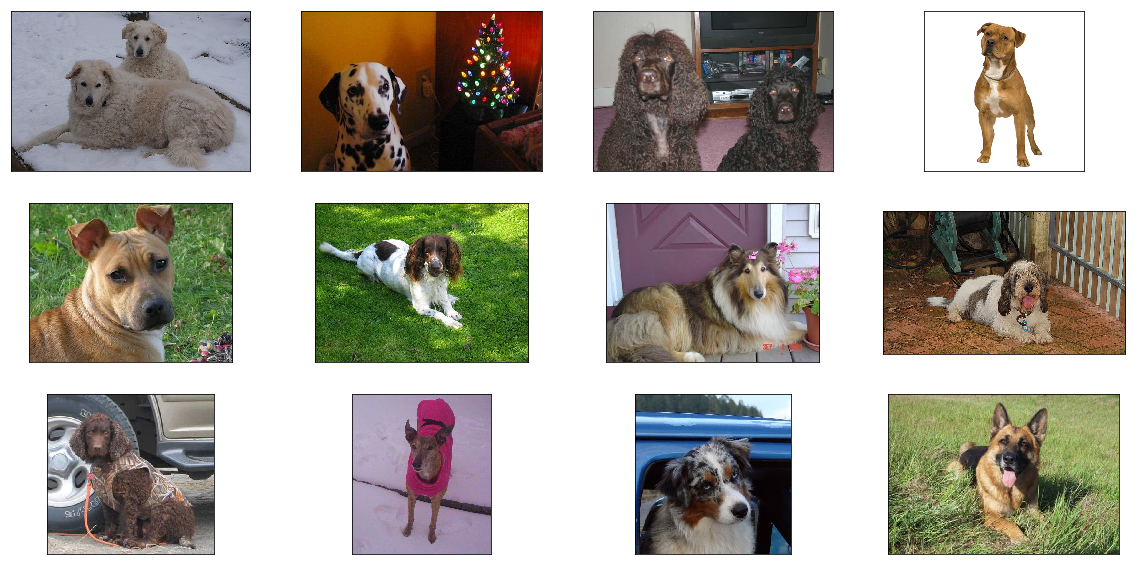

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_img(img_path, ax):
    img = cv2.imread(img_path)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
fig = plt.figure(figsize=(20, 10))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1, xticks=[], yticks=[])
    visualize_img(train_files[i], ax)

### 3. Obtain the VGG-16 Bottleneck Features

Before running the code cell below, download the file linked [here](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG16Data.npz) and place it in the `bottleneck_features/` folder.
经过训练好的数据，穿过了前面的Vgg16的多层

In [10]:
bottleneck_features = np.load(r'C:\Users\zhangwenqi\Desktop\data_for_neural_network\dogImages\DogVGG16Data.npz')
train_vgg16 = bottleneck_features['train']
valid_vgg16 = bottleneck_features['valid']
test_vgg16 = bottleneck_features['test']

In [14]:
print(np.shape(train_vgg16))
print(np.shape(valid_vgg16))
print(np.shape(test_vgg16))

(6680, 7, 7, 512)
(835, 7, 7, 512)
(836, 7, 7, 512)


### 4. Define a Model Architecture (Model 1)

In [21]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(7, 7, 512)))
model.add(Dense(133, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               3336837   
Total params: 3,336,837
Trainable params: 3,336,837
Non-trainable params: 0
_________________________________________________________________


### 5. Define another Model Architecture (Model 2)

In [16]:
from keras.layers import GlobalAveragePooling2D

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7, 7, 512)))#增加了全局优化池GAP，用来减少参数，防止过拟合，即每7*7个方格中取一个
model.add(Dense(133, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### 6. Compile the Model (Model 2)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model (Model 2)

In [23]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='dogvgg16.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit(train_vgg16, train_targets, epochs=20, validation_data=(valid_vgg16, valid_targets), 
          callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 11s 2ms/step - loss: 15.9064 - acc: 0.0123 - val_loss: 15.8839 - val_acc: 0.0144
Epoch 2/20
6680/6680 [==============================] - 11s 2ms/step - loss: 15.7651 - acc: 0.0216 - val_loss: 15.6732 - val_acc: 0.0275
Epoch 3/20
6680/6680 [==============================] - 11s 2ms/step - loss: 15.5670 - acc: 0.0329 - val_loss: 15.5282 - val_acc: 0.0359
Epoch 4/20
6680/6680 [==============================] - 11s 2ms/step - loss: 15.3163 - acc: 0.0485 - val_loss: 15.3096 - val_acc: 0.0491
Epoch 5/20
6680/6680 [==============================] - 11s 2ms/step - loss: 15.2197 - acc: 0.0552 - val_loss: 15.1985 - val_acc: 0.0551
Epoch 6/20
6680/6680 [==============================] - 11s 2ms/step - loss: 15.1625 - acc: 0.0587 - val_loss: 15.1483 - val_acc: 0.0599
Epoch 7/20
6680/6680 [==============================] - 11s 2ms/step - loss: 15.1487 - acc: 0.0599 - val_loss: 15.1336 - val_acc: 0

### 8. Load the Model with the Best Validation Accuracy (Model 2)

In [19]:
# load the weights that yielded the best validation accuracy
model.load_weights('dogvgg16.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set (Model 2)

In [28]:
model.predict(np.expand_dims(feature, axis=0))

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.6606813e-30,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [52]:
# get index of predicted dog breed for each image in test set
vgg16_predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) #argmax为取最大元素的索引值，即返回热独编码前的0-133标签编号
                     for feature in test_vgg16]
#vgg16_predictions得到每组数据对应的类别编号
# report test accuracy
test_accuracy = 100*np.sum(np.array(vgg16_predictions)==
                           np.argmax(test_targets, axis=1))/len(vgg16_predictions)
print('\nTest accuracy: %.4f%%' % test_accuracy)


Test accuracy: 9.2105%


In [53]:
vgg16_predictions

[38,
 11,
 11,
 123,
 105,
 105,
 38,
 11,
 87,
 50,
 1,
 123,
 88,
 35,
 11,
 11,
 50,
 38,
 16,
 88,
 50,
 38,
 88,
 88,
 35,
 105,
 123,
 123,
 105,
 16,
 38,
 38,
 11,
 11,
 105,
 11,
 105,
 38,
 50,
 38,
 38,
 11,
 41,
 105,
 105,
 123,
 16,
 38,
 87,
 38,
 105,
 38,
 105,
 38,
 105,
 11,
 11,
 35,
 88,
 38,
 11,
 38,
 38,
 38,
 16,
 123,
 41,
 88,
 38,
 52,
 87,
 88,
 16,
 38,
 20,
 52,
 88,
 88,
 50,
 105,
 11,
 38,
 11,
 88,
 38,
 88,
 11,
 11,
 123,
 11,
 16,
 52,
 35,
 38,
 20,
 38,
 88,
 11,
 87,
 50,
 38,
 38,
 11,
 123,
 88,
 16,
 88,
 11,
 11,
 35,
 16,
 52,
 88,
 11,
 38,
 38,
 16,
 38,
 105,
 105,
 11,
 35,
 38,
 16,
 38,
 11,
 38,
 123,
 38,
 20,
 38,
 11,
 1,
 11,
 38,
 1,
 38,
 88,
 11,
 35,
 11,
 88,
 38,
 11,
 11,
 35,
 50,
 88,
 123,
 105,
 87,
 123,
 38,
 38,
 41,
 1,
 105,
 88,
 11,
 16,
 88,
 11,
 11,
 87,
 105,
 35,
 88,
 35,
 38,
 11,
 105,
 38,
 38,
 38,
 35,
 11,
 38,
 35,
 11,
 38,
 105,
 11,
 88,
 11,
 50,
 52,
 11,
 38,
 123,
 38,
 11,
 38,
 88,
 123,
 1

## 另一种方法

In [34]:
np.shape(model.predict(test_vgg16))

(836, 133)

In [37]:
model.predict(test_vgg16)

array([[2.6487558e-32, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [50]:
result=model.predict(test_vgg16)
predict_vgg16=[]

for list_predict in result:
    predict_vgg16.append(np.argmax(list_predict,axis=0))

In [51]:
predict_vgg16

[38,
 11,
 11,
 123,
 105,
 105,
 38,
 11,
 87,
 50,
 1,
 123,
 88,
 35,
 11,
 11,
 50,
 38,
 16,
 88,
 50,
 38,
 88,
 88,
 35,
 105,
 123,
 123,
 105,
 16,
 38,
 38,
 11,
 11,
 105,
 11,
 105,
 38,
 50,
 38,
 38,
 11,
 41,
 105,
 105,
 123,
 16,
 38,
 87,
 38,
 105,
 38,
 105,
 38,
 105,
 11,
 11,
 35,
 88,
 38,
 11,
 38,
 38,
 38,
 16,
 123,
 41,
 88,
 38,
 52,
 87,
 88,
 16,
 38,
 20,
 52,
 88,
 88,
 50,
 105,
 11,
 38,
 11,
 88,
 38,
 88,
 11,
 11,
 123,
 11,
 16,
 52,
 35,
 38,
 20,
 38,
 88,
 11,
 87,
 50,
 38,
 38,
 11,
 123,
 88,
 16,
 88,
 11,
 11,
 35,
 16,
 52,
 88,
 11,
 38,
 38,
 16,
 38,
 105,
 105,
 11,
 35,
 38,
 16,
 38,
 11,
 38,
 123,
 38,
 20,
 38,
 11,
 1,
 11,
 38,
 1,
 38,
 88,
 11,
 35,
 11,
 88,
 38,
 11,
 11,
 35,
 50,
 88,
 123,
 105,
 87,
 123,
 38,
 38,
 41,
 1,
 105,
 88,
 11,
 16,
 88,
 11,
 11,
 87,
 105,
 35,
 88,
 35,
 38,
 11,
 105,
 38,
 38,
 38,
 35,
 11,
 38,
 35,
 11,
 38,
 105,
 11,
 88,
 11,
 50,
 52,
 11,
 38,
 123,
 38,
 11,
 38,
 88,
 123,
 1